In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
GME = pd.read_csv("/content/drive/MyDrive/DS 340W/Final Research Paper/Datasets/GME_5Y.csv")

In [ ]:
GME.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-23,24.150000,24.440001,23.799999,23.959999,19.785828,4662200
1,2017-03-24,21.370001,21.559999,20.660000,20.700001,17.093767,15944600
2,2017-03-27,20.330000,21.090000,20.240000,20.850000,17.217636,6962300
3,2017-03-28,20.879999,21.780001,20.730000,21.719999,17.936069,4278600
4,2017-03-29,21.780001,22.139999,21.570000,21.950001,18.126001,3258300
5,2017-03-30,21.900000,22.490000,21.860001,22.459999,18.547148,2222000
6,2017-03-31,22.459999,22.740000,22.370001,22.549999,18.621469,2934200
7,2017-04-03,22.520000,22.620001,21.920000,22.000000,18.167290,2709100
8,2017-04-04,21.940001,22.209999,21.740000,21.980000,18.150772,2237000
9,2017-04-05,22.190001,22.290001,21.740000,21.760000,17.969097,2168900


In [ ]:
GME.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [ ]:
GME_NEW=GME.dropna(axis=0)
GME_NEW

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-23,24.150000,24.440001,23.799999,23.959999,19.785828,4662200
1,2017-03-24,21.370001,21.559999,20.660000,20.700001,17.093767,15944600
2,2017-03-27,20.330000,21.090000,20.240000,20.850000,17.217636,6962300
3,2017-03-28,20.879999,21.780001,20.730000,21.719999,17.936069,4278600
4,2017-03-29,21.780001,22.139999,21.570000,21.950001,18.126001,3258300
...,...,...,...,...,...,...,...
1254,2022-03-16,85.110001,90.010002,82.000000,86.860001,86.860001,2653900
1255,2022-03-17,85.099998,89.580002,83.449997,87.699997,87.699997,3449100
1256,2022-03-18,79.739998,97.449997,78.900002,90.790001,90.790001,8913800
1257,2022-03-21,90.000000,99.400002,89.760002,94.199997,94.199997,3953100


In [ ]:
GME_NEW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 78.7+ KB


In [ ]:
GME_NEW['Close']=pd.to_numeric(GME_NEW.Close,errors='coerce')
GME_NEW = GME_NEW.dropna()
GME_TRAIN = GME_NEW.iloc[:,4:5].values

In [ ]:
GME_NEW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 78.7+ KB


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
GME_TRAIN = sc.fit_transform(GME_TRAIN)
GME_TRAIN.shape

(1259, 1)

In [ ]:
x_train = []
y_train = []

for i in range (60,1227):
  x_train.append(GME_TRAIN[i-60:i,0])
  y_train.append(GME_TRAIN[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1167, 60, 1)

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences= True))
model.add(Dropout(0.2))


model.add(LSTM(units=100, return_sequences= True))
model.add(Dropout(0.2))


model.add(LSTM(units=100, return_sequences= False))
model.add(Dropout(0.2))


model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
hist = model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
37/37 - 14s - loss: 0.0113 - 14s/epoch - 391ms/step
Epoch 2/20
37/37 - 7s - loss: 0.0060 - 7s/epoch - 177ms/step
Epoch 3/20
37/37 - 7s - loss: 0.0053 - 7s/epoch - 178ms/step
Epoch 4/20
37/37 - 7s - loss: 0.0050 - 7s/epoch - 177ms/step
Epoch 5/20
37/37 - 7s - loss: 0.0047 - 7s/epoch - 178ms/step
Epoch 6/20
37/37 - 7s - loss: 0.0047 - 7s/epoch - 179ms/step
Epoch 7/20
37/37 - 7s - loss: 0.0043 - 7s/epoch - 179ms/step
Epoch 8/20
37/37 - 7s - loss: 0.0034 - 7s/epoch - 177ms/step
Epoch 9/20
37/37 - 7s - loss: 0.0038 - 7s/epoch - 181ms/step
Epoch 10/20
37/37 - 7s - loss: 0.0034 - 7s/epoch - 178ms/step
Epoch 11/20
37/37 - 7s - loss: 0.0031 - 7s/epoch - 176ms/step
Epoch 12/20
37/37 - 7s - loss: 0.0029 - 7s/epoch - 177ms/step
Epoch 13/20
37/37 - 7s - loss: 0.0036 - 7s/epoch - 177ms/step
Epoch 14/20
37/37 - 7s - loss: 0.0029 - 7s/epoch - 179ms/step
Epoch 15/20
37/37 - 7s - loss: 0.0030 - 7s/epoch - 179ms/step
Epoch 16/20
37/37 - 7s - loss: 0.0027 - 7s/epoch - 177ms/step
Epoch 17/20
37/

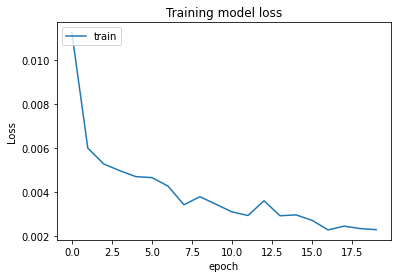

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [ ]:
GME_NEW.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
GME_TEST = pd.read_csv("/content/drive/MyDrive/DS 340W/Final Research Paper/Datasets/GME_5Y.csv")
GME_TEST["Close"]=pd.to_numeric(GME_TEST.Close, errors='coerce')
GME_TEST = GME_TEST.dropna()
GME_TEST = GME_TEST.iloc[:,4:5]
y_test = GME_TEST.iloc[60:,0:].values

inputClosing = GME_TEST.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
x_test = []
length = len(GME_TEST)
timestep = 60
for i in range (timestep, length):
  x_test.append(inputClosing_scaled[i-timestep:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(1199, 60, 1)

In [ ]:
y_predict = model.predict(x_test)
y_predict

array([[0.07448426],
       [0.07350074],
       [0.07252383],
       ...,
       [0.29057333],
       [0.29519078],
       [0.30499423]], dtype=float32)

In [ ]:
predicted_price = sc.inverse_transform(y_predict)

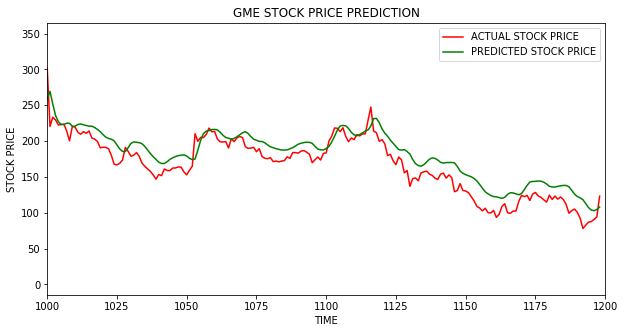

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test, color='red', label='ACTUAL STOCK PRICE')
plt.plot(predicted_price, color='green', label='PREDICTED STOCK PRICE')
plt.title('GME STOCK PRICE PREDICTION')
plt.xlabel('TIME')
plt.ylabel('STOCK PRICE')
plt.legend()
plt.xlim([1000, 1200])
plt.show()

In [ ]:
from sklearn import metrics